In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Module2/Week2/Data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Module2/Week2/Data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Module2/Week2/Data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

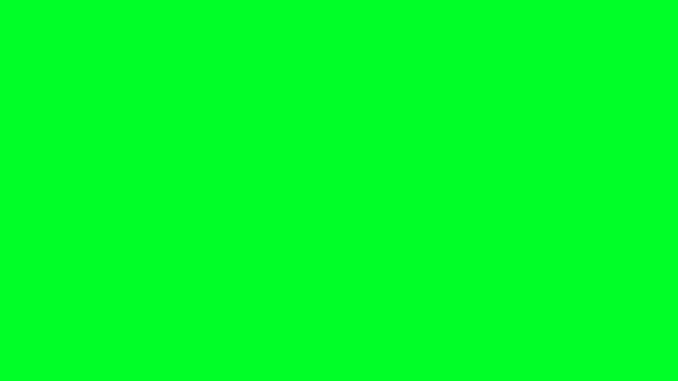

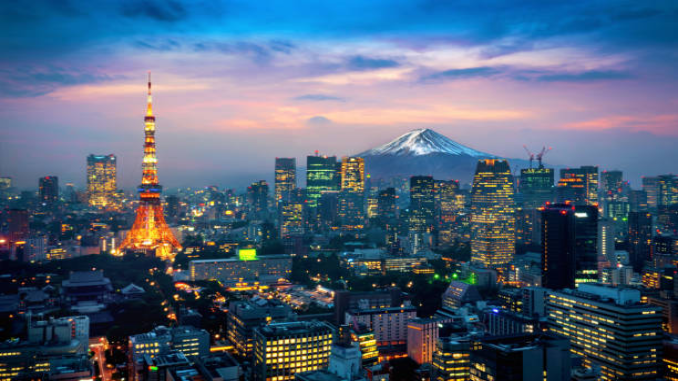

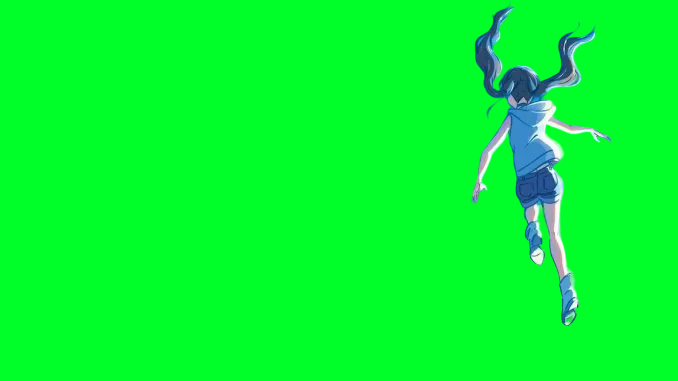

In [9]:
cv2_imshow(bg1_image)
cv2_imshow(bg2_image)
cv2_imshow(ob_image)


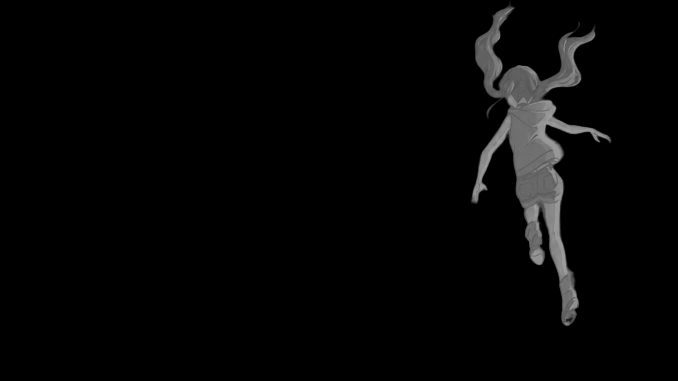

In [13]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

difference_single_channel = computeDifference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

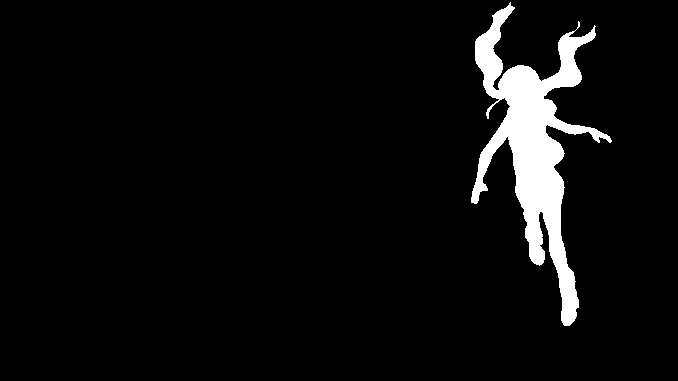

In [14]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

binary_mask = computeBinaryMask(difference_single_channel)
cv2_imshow(binary_mask)

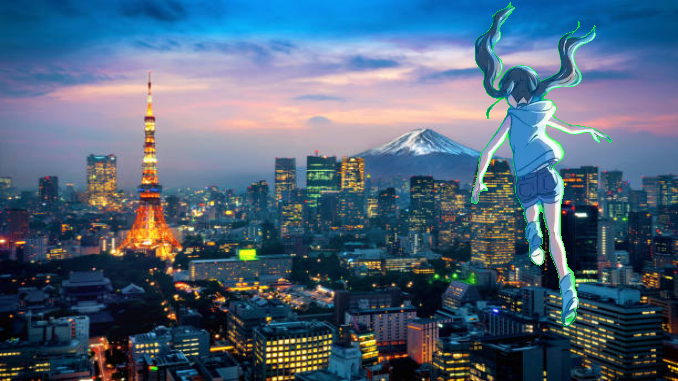

In [15]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output


output = replaceBackGround(bg1_image, bg2_image, ob_image)
cv2_imshow(output)